In [1]:
%cd '/content/drive/My Drive/Data Mining/Assignment 03'


/content/drive/My Drive/Data Mining/Assignment 03


PROPER

THIS IS THE FINAL ONE

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

data = pd.read_csv('creditcard.csv')

train_data = data.drop(columns=['Time', 'Class'])
print("Train data shape:", train_data.shape)

def geometric_mask(data, p=0.1, mask_value=0):
    mask = np.random.geometric(p, size=data.shape) > 1  #Adjust p
    return np.where(mask, mask_value, data)

def build_transformer_autoencoder(input_dim, embedding_dim=64, num_heads=2, ff_dim=32):
    inputs = layers.Input(shape=(input_dim,))
    x = layers.Dense(embedding_dim, activation='relu')(inputs)
    x = layers.Reshape((1, embedding_dim))(x)  #Reshape
    attention_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embedding_dim // num_heads)(x, x)
    x = layers.Add()([x, attention_output])
    x = layers.LayerNormalization()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(ff_dim, activation='relu')(x)
    outputs = layers.Dense(input_dim, activation='sigmoid')(x)
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

model = build_transformer_autoencoder(input_dim=train_data.shape[1])
model.compile(optimizer='adam', loss='mse')
model.summary()

train_data = train_data.to_numpy()
np.random.shuffle(train_data)

epochs = 10
batch_size = 32

for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    for i in range(0, len(train_data), batch_size):
        batch_data = train_data[i:i + batch_size]
        augmented_data = geometric_mask(batch_data)
        loss = model.train_on_batch(augmented_data, batch_data)
        print(f"Batch {i//batch_size+1}/{len(train_data)//batch_size} - Loss: {loss}")


model.save('final_model.h5')


Streaming output truncated to the last 5000 lines.
Batch 3902/8900 - Loss: 272.5908203125
Batch 3903/8900 - Loss: 803.89404296875
Batch 3904/8900 - Loss: 1020.8179931640625
Batch 3905/8900 - Loss: 692.9066162109375
Batch 3906/8900 - Loss: 1200.774169921875
Batch 3907/8900 - Loss: 1730.2197265625
Batch 3908/8900 - Loss: 555.449951171875
Batch 3909/8900 - Loss: 2592.47265625
Batch 3910/8900 - Loss: 341.25836181640625
Batch 3911/8900 - Loss: 431.8837890625
Batch 3912/8900 - Loss: 619.1646728515625
Batch 3913/8900 - Loss: 453.3240051269531
Batch 3914/8900 - Loss: 109.32896423339844
Batch 3915/8900 - Loss: 691.975341796875
Batch 3916/8900 - Loss: 492.5628967285156
Batch 3917/8900 - Loss: 4718.72607421875
Batch 3918/8900 - Loss: 2929.95361328125
Batch 3919/8900 - Loss: 164.08546447753906
Batch 3920/8900 - Loss: 9951.2236328125
Batch 3921/8900 - Loss: 991.5986328125
Batch 3922/8900 - Loss: 244.47695922851562
Batch 3923/8900 - Loss: 4533.19775390625
Batch 3924/8900 - Loss: 5392.8076171875
Batc

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8901/8901 [==============================] - 23s 3ms/step
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    284315
           1       0.00      0.09      0.01       492

    accuracy                           0.95    284807
   macro avg       0.50      0.52      0.49    284807
weighted avg       1.00      0.95      0.97    284807



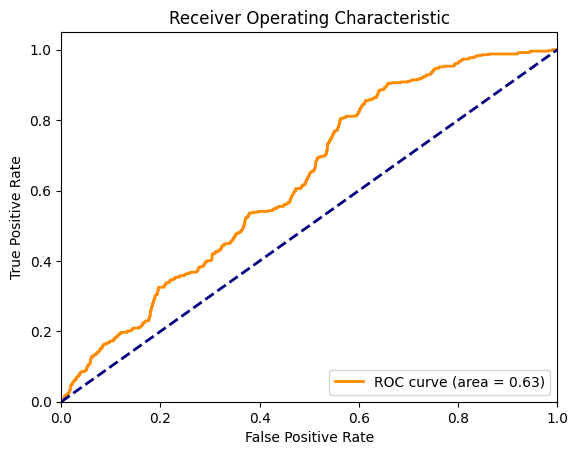

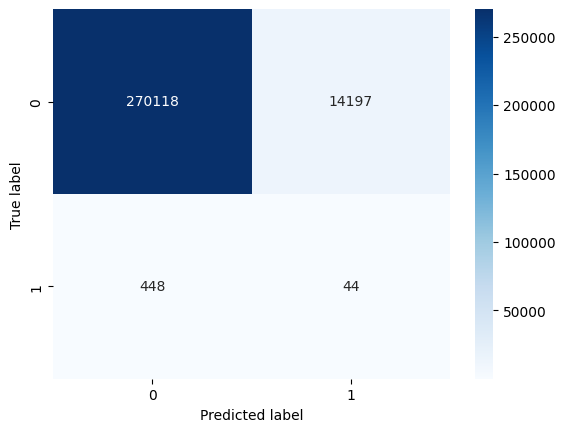

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('creditcard.csv')
model = load_model('final_model.h5')

train_data = data.drop(columns=['Time', 'Class']).to_numpy()
true_labels = data['Class'].values

predicted = model.predict(train_data)

errors = np.mean(np.power(train_data - predicted, 2), axis=1)

threshold = np.percentile(errors, 95)
pred_labels = (errors > threshold).astype(int)
print(classification_report(true_labels, pred_labels))

fpr, tpr, thresholds = roc_curve(true_labels, errors)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(true_labels, pred_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
